# Nuclear Chart plotter

Created on 05 November 2019

@author: Jonas Karthein<br/>
@contact: jonas.karthein@cern.ch<br/>
@license: MIT license

### References
[1]: W.J. Huang, et al. Chinese Phys. C 41, 030002 (2017).<br/>
[2]: [Linguistics Pro Font (= Utopia Font incl. math symbols)](https://www.fontsquirrel.com/fonts/linguistics-pro)

### Application
The code was used for the dissertation of Jonas Karthein and for several scientific presentations.

### Introduction
The following code was written to provide publication-ready plots of the nuclear chart, based on the Atomic Mass Evaluation 2016 [1].

### Required software and libraries
The following code was written in Python 3.7. The required libraries are listed below with a rough description for their task in the code. It doesn't claim to be a full description of the library.

- pandas (data storage and calculation)<br/>
- numpy (calculation)<br/>
- matplotlib (plotting)<br/>
- jupyter (Python notebook environment)<br/>

All packages can be fetched using pip:

In [1]:
!pip3 install pandas numpy matplotlib jupyter

In [2]:
import pandas as pd
import numpy as np
from scipy.constants import physical_constants

m_p = physical_constants['proton mass energy equivalent in MeV'][0]
m_n = physical_constants['neutron mass energy equivalent in MeV'][0]

# loading the AME16 mass evaluation table
ame_df = pd.read_fwf('bin/ame16.txt',
                      skiprows=39,
                      names=['new_el', 'N_Z', 'N', 'Z', 'A', 'el', 'o', 'ME_keV',
                            'ME_unc_keV', 'BE_keV',
                            'BE_unc_keV', 'B', 'Q_keV',
                            'Q_unc_keV', 'mass_micro_u',
                            'mass_unc_micro_u'],
                      widths=[1,3,5,5,5,4,4,15,11,12,7,3,11,9,17,11])

# loading the NUBASE16 table including information about isomers
nubase_df = pd.read_fwf('bin/nubase16.txt',
                      names=['A', 'Z_+', 'el', 'ME_keV',
                            'ME_unc_keV', 'Ex_keV',
                            'Ex_unc_keV', 'Ex_origin', 't_1_2', 't_1_2_unit', 't_1_2_unc', 'JP', 'T',
                            'ensdf', 'ref', 'yr', 'decay'],
                      widths=[4,7,7,11,9,10,8,4,9,3,7,8,6,3,9,5,77])

# adding necessary info like the proton number Z, neutron number N, and the year of discovery for plotting
nubase_df['Z'] = nubase_df['Z_+'].str[0:3].astype(int)
nubase_df['N'] = nubase_df.A - nubase_df.Z
nubase_df.yr = nubase_df.yr.fillna(9999).astype(int)   # not discovered yet -> year = 9999
nubase_df = nubase_df.set_index('el')

# marking the extrapolated values, removing the '#' and '*' symbols and converting all values into floats
ame_df['extrapol'] = (ame_df.ME_keV.str[-1] == '#')
ame_df = ame_df.replace('#', '.0', regex=True)
ame_df = ame_df.replace('*', np.nan)
ame_df[['ME_keV','ME_unc_keV','BE_keV','BE_unc_keV','Q_keV',
        'Q_unc_keV','mass_micro_u','mass_unc_micro_u']] = ame_df[['ME_keV','ME_unc_keV','BE_keV',
                                                                  'BE_unc_keV','Q_keV','Q_unc_keV',
                                                                  'mass_micro_u','mass_unc_micro_u'
                                                                 ]].apply(pd.to_numeric)
nubase_df['extrapol'] = (nubase_df.ME_keV.str[-1] == '#')
nubase_df = nubase_df.replace('#', '.0', regex=True)
nubase_df[['ME_keV','ME_unc_keV','Ex_keV','Ex_unc_keV']] = nubase_df[['ME_keV','ME_unc_keV','Ex_keV',
                                                                  'Ex_unc_keV']].apply(pd.to_numeric, errors='coerce')


# read ISOLDE yield info
import xml.etree.ElementTree as ET
import re
isolde_yields = {}

for child in ET.parse('bin/Isolde-nuclide-chart-bigger.xml').getroot():
    el = child.attrib['id']
    yields = child[2].text
    isolde_yields[re.findall('\d+', el)[0]+re.findall('[A-Za-z]+', el)[0]] = yields
nubase_df['isolde_yields'] = pd.Series(isolde_yields)
nubase_df['isolde_yields_log'] = np.log(nubase_df.isolde_yields.astype(float))
ame_df['mass_prec'] = np.log(abs(np.log(ame_df.mass_unc_micro_u[(ame_df.extrapol == False)] / 
                             ame_df.mass_micro_u[(ame_df.extrapol == False)])))
nubase_df['mass_prec'] = nubase_df.ME_unc_keV / (nubase_df.Z*m_p*1000 + nubase_df.N*m_n*1000 - nubase_df.ME_keV)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.extrapol == False)&(nubase_df.t_1_2_unit.str[0:3].isin(['min','s', 'ms', 'us', 'ns', 'as']))].mass_prec.nsmallest(10)

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


el
1 n      5.367721e-10
34Cl     1.565059e-09
20F      1.597471e-09
14O      1.903230e-09
116In    2.018081e-09
41Sc     2.076646e-09
34Ar     2.504671e-09
25Al     2.555232e-09
37K      2.588874e-09
114In    2.800188e-09
Name: mass_prec, dtype: float64

# General chart -- year of discovery

posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


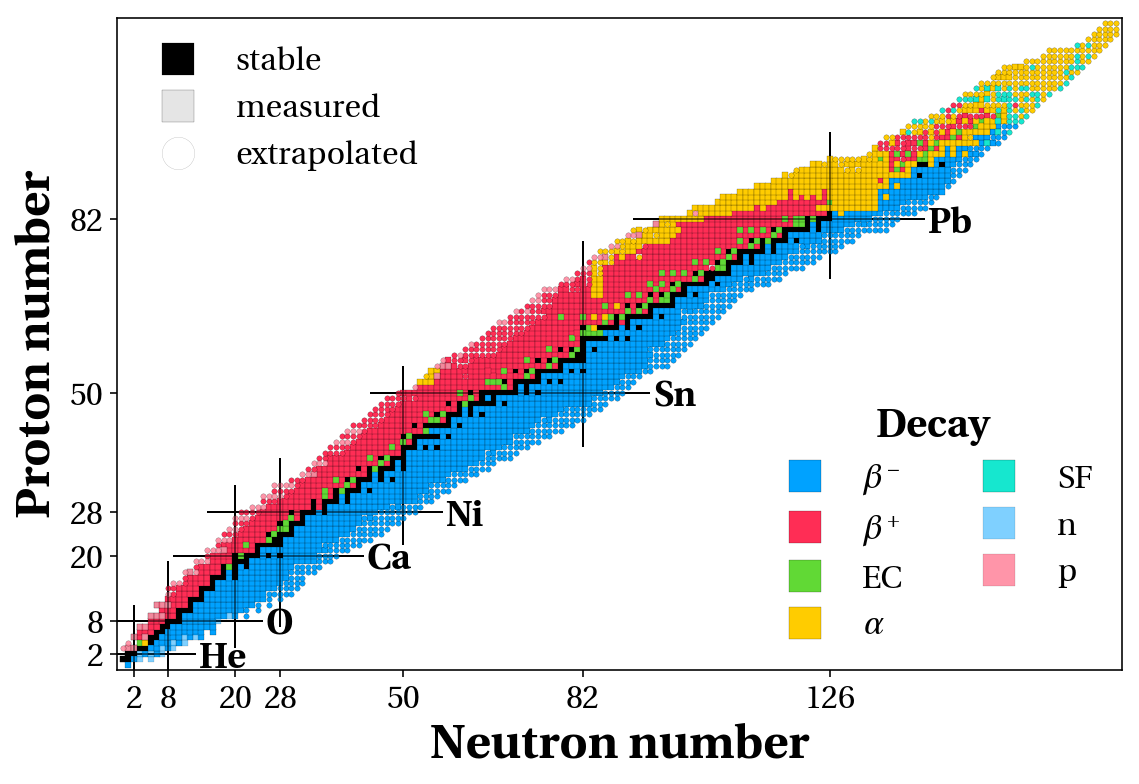

In [3]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(9,6))

# only measured values of ground states
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'IS')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\beta^-$', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\beta^+$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='EC', lw=0, marker='s', markersize=2.7, markerfacecolor='#61D935', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\alpha$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC00', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='n', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='SF', lw=0, marker='s', markersize=2.7, markerfacecolor='#16E7CF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='measured', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='p', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')

# displaying extrapolated values of ground states
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#00A2FF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FFCC00', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#16E7CF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D55', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')

# inserting lines to display the magic numbers and adding the "magic elements"
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_el = ['He', 'O', 'Ca', 'Ni', 'Sn', 'Pb', 'Ubh']
for i in range(len(magic_nrs)):
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', linewidth=1)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', linewidth=1)
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.text(x=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5.5,
             y=magic_nrs[i]-2.5,
             s='{}'.format(magic_el[i]), fontweight='bold', fontsize=18)
    
# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
plt.xticks(magic_nrs, magic_nrs)
plt.yticks(magic_nrs, magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)

plt.tick_params(labelsize=16)

handles, labels = ax.get_legend_handles_labels()    # allows splitting the legend
handles1 = [handles[1],handles[2],handles[3],handles[4],handles[6],handles[5],handles[8]]
handles2 = [handles[0],handles[7],handles[9]]

lg1 = ax.legend(handles=handles1,loc=4,title = 'Decay', markerscale=6,fontsize=16, ncol=2, edgecolor='white')
plt.setp(lg1.get_title(),fontsize=20,fontweight='bold')    # legend title bold
plt.gca().add_artist(lg1)
lg2 = ax.legend(handles=handles2,loc=2,fontsize=16, markerscale=6, ncol=1, edgecolor='white')
plt.setp(lg2.get_title(),fontsize=20,fontweight='bold')    # legend title bold

plt.savefig('nuclear-chart.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# ISOLDE yields

posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


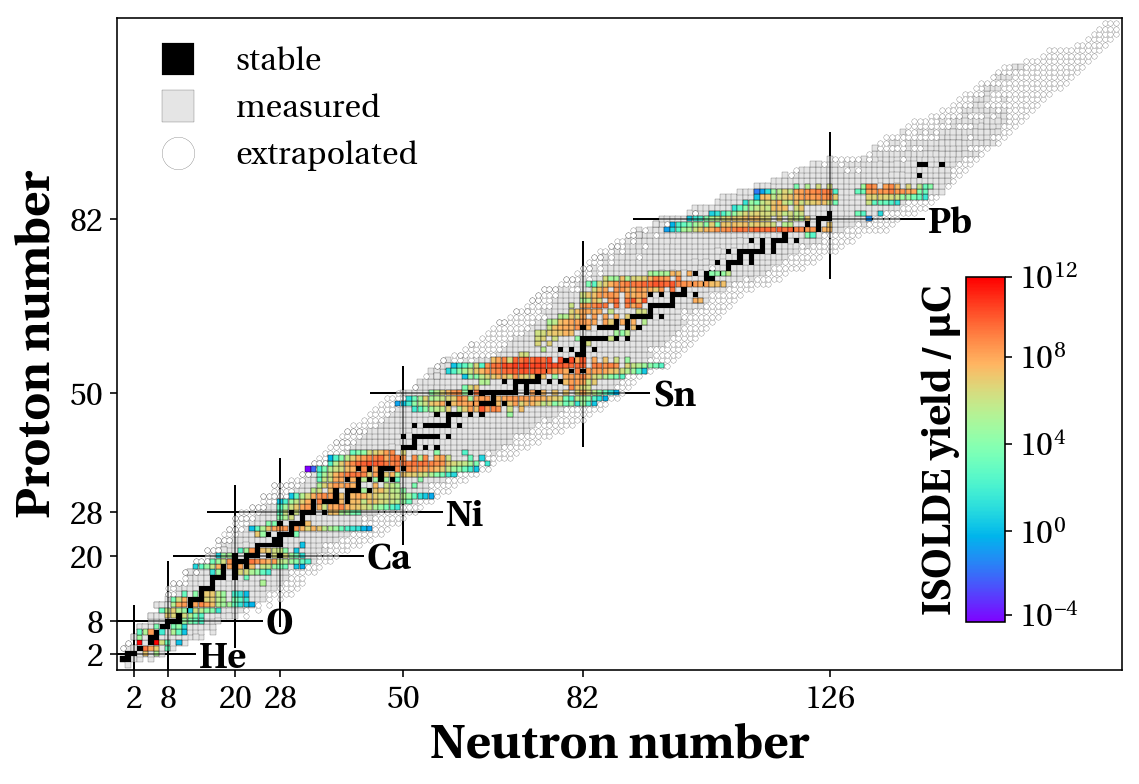

In [4]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

import warnings
warnings.filterwarnings('ignore')

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:bold',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(9,6))
plt.tick_params(labelsize=16)

# measured masses
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'IS')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='measured', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=3)

# extrapolated masses
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k', zorder=3)


# inserting lines to display the magic numbers and adding the "magic elements"
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_el = ['He', 'O', 'Ca', 'Ni', 'Sn', 'Pb', 'Ubh']
for i in range(len(magic_nrs)):
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', linewidth=1)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', linewidth=1)
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.text(x=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5.5,
             y=magic_nrs[i]-2.5,
             s='{}'.format(magic_el[i]), fontweight='bold', fontsize=18)
    
# plot yield with a colormap in a logarithmic fashion
sc = ax.scatter(x=nubase_df.N.tolist(), y=nubase_df.Z.tolist(), c=nubase_df.isolde_yields_log.tolist(),
                s=7, marker='s', edgecolors='k', linewidths=.2, cmap='rainbow',zorder=6)    

# inserting the color map
ax2 = f.add_axes([0.78, 0.18, 0.03, 0.4])
cbar = plt.colorbar(sc, cax=ax2, ticks=[np.log(6e-04),np.log(4e+00),np.log(4e+04),np.log(4e+08),np.log(2e+12)])
ax2.set_ylabel('ISOLDE yield / $\mu$C', fontsize=20, fontweight='bold', labelpad=-80)
cbar.ax.set_yticklabels(['$10^{-4}$','$10^{0}$','$10^{4}$','$10^{8}$','$10^{12}$'])

plt.tick_params(axis='both', which='major', labelsize=16)


# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
ax.set_xticks(magic_nrs)
ax.set_yticks(magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)


lg = ax.legend(fontsize=16, markerscale=6, loc=2, ncol=1, edgecolor='white')
plt.setp(lg.get_title(),fontsize=20,fontweight='bold')    # legend title bold


plt.savefig('nuclear-chart-isolde-yield.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# Isotopes measured/published at ISOLTRAP since 2017

posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


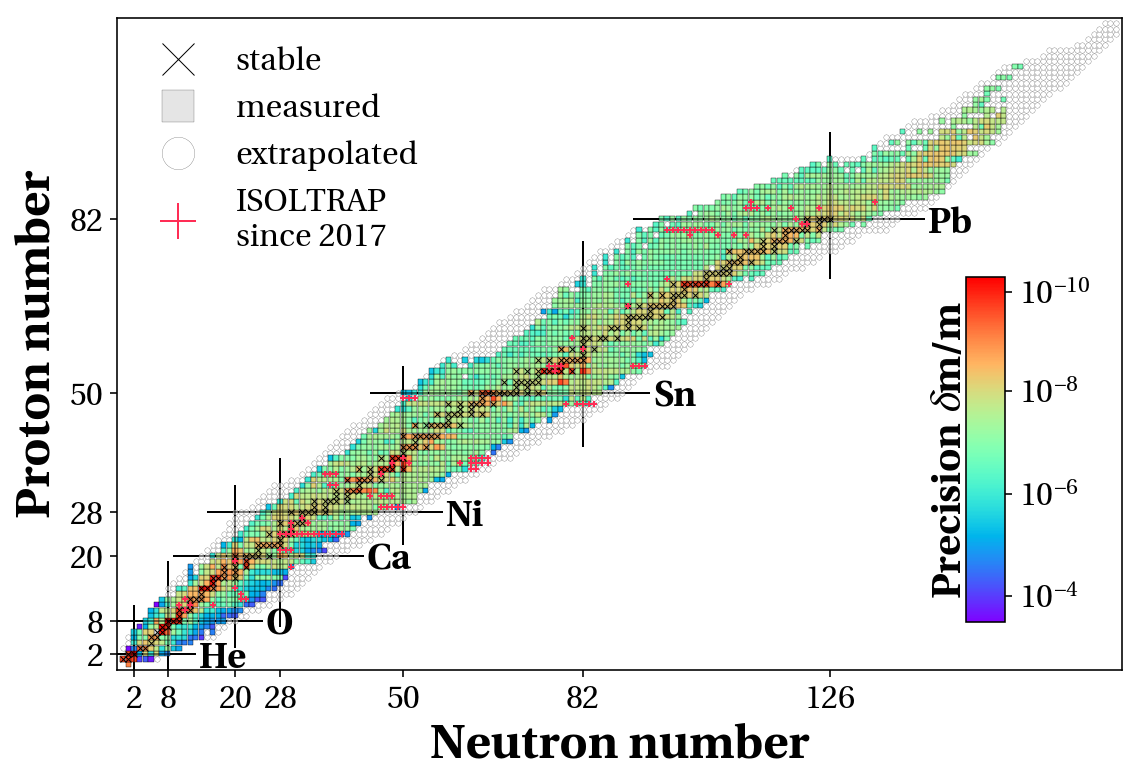

In [5]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(9,6))
plt.tick_params(labelsize=16)

# loglog-plot of mass uncertainty
sc_m_unc = ax.scatter(x=ame_df.N.tolist(), y=ame_df.Z.tolist(), c=ame_df.mass_prec.tolist(),
                      s=7, marker='s', edgecolors='k', linewidths=.2, cmap='rainbow',zorder=3)

# plotting the stable and extrapolated isotopes
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='x', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.5, markeredgecolor='k', zorder=3)
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='measured', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k', zorder=0)
ame_df[ame_df.extrapol == True].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k',zorder=2)


# inserting lines to display the magic numbers and adding the "magic elements"
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_el = ['He', 'O', 'Ca', 'Ni', 'Sn', 'Pb', 'Ubh']
for i in range(len(magic_nrs)):
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', linewidth=1)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', linewidth=1)
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.text(x=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5.5,
             y=magic_nrs[i]-2.5,
             s='{}'.format(magic_el[i]), fontweight='bold', fontsize=18)        

# lists of measured or published masses since 2017 at the ISOLTRAP setup at CERN/ISOLDE
masses_2017__ = ['39K', '85Rb', '133Cs',    # offline source
                 '88Sr', '88Rb',    # 2017-05 ArKr
                 '127Cd', '129Cd', '130Cd', '131Cd', '132Cd',    # 2017-07 Cd
                 '131Cs',    # 2017-07 Cs
                 '48Ar', '98Kr', '99Kr',    # 2017-08 ArKr
                 '49Sc', '50Sc', '51Sc', '99In', '100In', '101In',    # 2018-04 ScIn
                 '70As', '71As', '71Br', '72Br', '73Br', '81Br']    # 2018-05 Br
publications_2017__ = ['27Na', '97Rb', '99Rb', '100Rb', '100Sr', '103Sr', '129Cd',    # R. Wolf - Nucl.Instrum. Meth. B 376, 275-280 (2016)
                       '132Cs', '146Cs', '147Cs', '148Cs',    # D. Atanasov - J. Phys. G 44, 064008 (2017)
                       '185Au', '197At', '219At', '180Au', '188Au', '190Au',    # V. Manea - Phys. Rev. C 95, 054322 (2017)
                       '100Sr', '101Sr', '102Sr', '100Rb', '101Rb', '102Rb',    # A. de Roubin - Phys. Rev. C 96, 014310 (2017)
                       '202Pb', '202Tl', '203Tl',    # A. Welker - Eur. Phys. J. A 53, 153 (2017)
                       '75Cu', '76Cu', '77Cu', '78Cu', '79Cu',    # A. Welker - Phys. Rev. Lett. 119, 192502 (2017)
                       '195Po', '196Po', '197Po', '199Po', '203Po', '208Po',    # N. Althubiti - Phys. Rev. C 96, 044325 (2017)
                       '58Cr', '59Cr', '60Cr', '61Cr', '62Cr', '63Cr',    # M. Mougeot - Phys. Rev. Lett. 120, 232501 (2018)
                       '177Hg', '178Hg', '179Hg', '180Hg', '181Hg', '182Hg', '183Hg', '184Hg', '185Hg',    # B. Marsh - Nature Physics 14, 1163 (2018) 
                       '131Cs', '131Xe',    # J. Karthein - Hyperfine Interact (2019) 240: 61
                       '52Cr', '53Cr', '54Cr', '55Cr', '56Cr', '57Cr', '55Mn', '56Fe', '59Fe', '59Co', '75Ga', '77Ga', '78Ga', '79Ga', '140Ce', '140Nd', '156Dy', '160Yb', '168Lu', '178Yb',    # W.J. Huang - Eur. Phys. J. A (2019) 55: 96.
                       '33Mg', '34Mg', '34Si', '34Al',    # P. Ascher - Phys. Rev. C 100, 014304 (2019)
                       '21Na', '21Ne', '23Mg', '23Na']    # J. Karthein - Phys. Rev. C 100, 015502 (2019)

# plotting those measured masses
ax.plot([i[0] for i in [nubase_df.N[nubase_df.index == i].tolist() for i in masses_2017__+publications_2017__]],
        [i[0] for i in [nubase_df.Z[nubase_df.index == i].tolist() for i in masses_2017__+publications_2017__]],
        marker='+', c='#FF2D55', lw=0, ms=3, mew=1, zorder=50, label='ISOLTRAP\nsince 2017')

# inserting the color map
ax2 = f.add_axes([0.78, 0.18, 0.03, 0.4])
cbar = plt.colorbar(sc_m_unc, cax=ax2, ticks=[np.log(abs(np.log(3e-11))),np.log(abs(np.log(1e-8))),
                                              np.log(abs(np.log(1e-6))),np.log(abs(np.log(3e-5)))])
ax2.set_ylabel('Precision $\delta$m/m', fontsize=20, fontweight='bold', labelpad=-80)
cbar.ax.set_yticklabels(['$10^{-10}$','$10^{-8}$','$10^{-6}$','$10^{-4}$'])

# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
ax.set_xticks(magic_nrs)
ax.set_yticks(magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)
plt.tick_params(axis='both', which='major', labelsize=16)

lg = ax.legend(fontsize=16, markerscale=6, loc=2, ncol=1, edgecolor='white')
plt.setp(lg.get_title(),fontsize=20,fontweight='bold')    # legend title bold

plt.savefig('nuclear-chart-ISOLTRAP-2017--.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# Nuclear chart: mass precision

posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


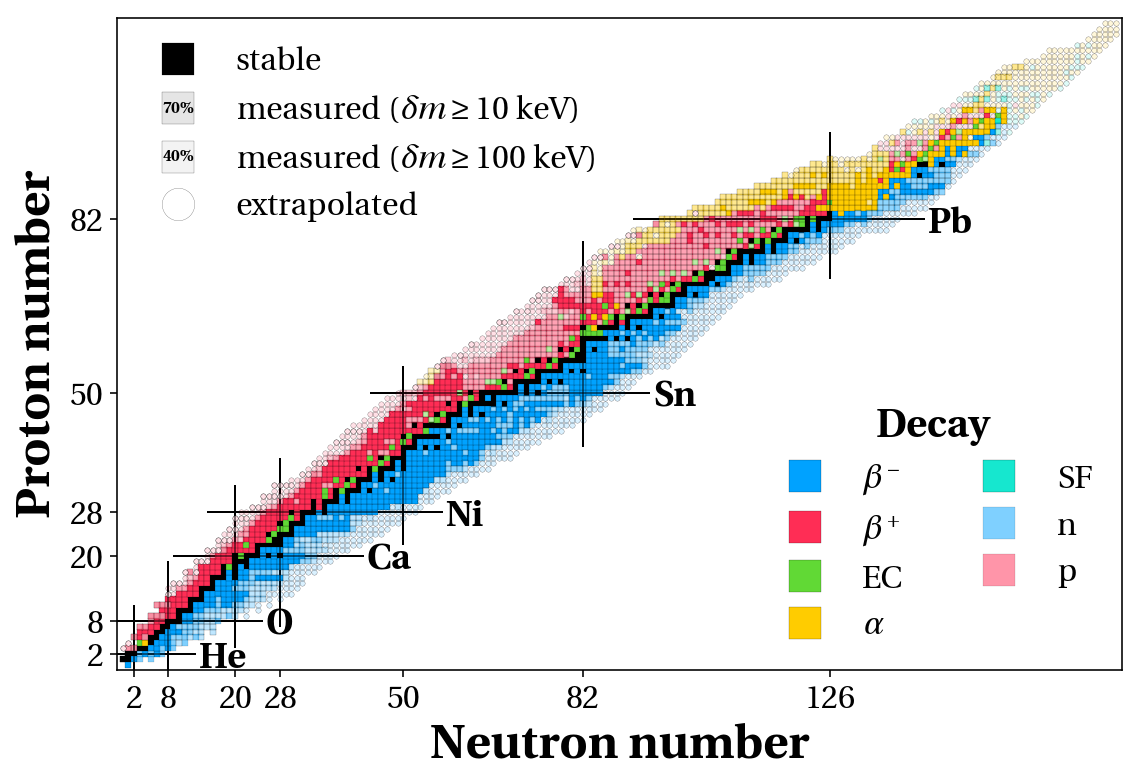

In [6]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(9,6))

# only measured values of ground states
limit = 100
limit2 = 10
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'IS')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='$\\beta^-$', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='$\\beta^+$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='EC', lw=0, marker='s', markersize=2.7, markerfacecolor='#61D935', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='$\\alpha$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC00', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='n', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='SF', lw=0, marker='s', markersize=2.7, markerfacecolor='#16E7CF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='measured ($\delta m \geq 10$ keV)', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='p', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')

# displaying [limit2]<x<[limit] keV uncertainty
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF70', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#61D93570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC0070', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF70', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#16E7CF70', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='measured ($\delta m \geq 100$ keV)', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5570', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
f.text(x=0.16,y=0.77,s='70%', fontweight='bold', fontsize=8)

# displaying x<[limit] keV uncertainty
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF40', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5540', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC0040', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF40', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E540', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5540', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
f.text(x=0.16,y=0.715,s='40%', fontweight='bold', fontsize=8)

# displaying extrapolated values of ground states
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#00A2FF25', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D5525', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FFCC0025', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#16E7CF25', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D5525', markeredgewidth=0.1, markeredgecolor='k')

# inserting lines to display the magic numbers and adding the "magic elements"
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_el = ['He', 'O', 'Ca', 'Ni', 'Sn', 'Pb', 'Ubh']
for i in range(len(magic_nrs)):
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', linewidth=1)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', linewidth=1)
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.text(x=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5.5,
             y=magic_nrs[i]-2.5,
             s='{}'.format(magic_el[i]), fontweight='bold', fontsize=18)
    
# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
plt.xticks(magic_nrs, magic_nrs)
plt.yticks(magic_nrs, magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)

plt.tick_params(labelsize=16)

handles, labels = ax.get_legend_handles_labels()    # allows splitting the legend
handles1 = [handles[1],handles[2],handles[3],handles[4],handles[6],handles[5],handles[8]]
handles2 = [handles[0],handles[7],handles[9],handles[10]]

lg1 = ax.legend(handles=handles1,loc=4,title = 'Decay', markerscale=6,fontsize=16, ncol=2, edgecolor='white')
plt.setp(lg1.get_title(),fontsize=20,fontweight='bold')    # legend title bold
plt.gca().add_artist(lg1)
lg2 = ax.legend(handles=handles2,loc=2,fontsize=16, markerscale=6, ncol=1, edgecolor='white')
plt.setp(lg2.get_title(),fontsize=20,fontweight='bold')    # legend title bold

plt.savefig('nuclear-chart-precision.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# Nuclear chart: mass precision (exp) + ISOLTRAP

posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


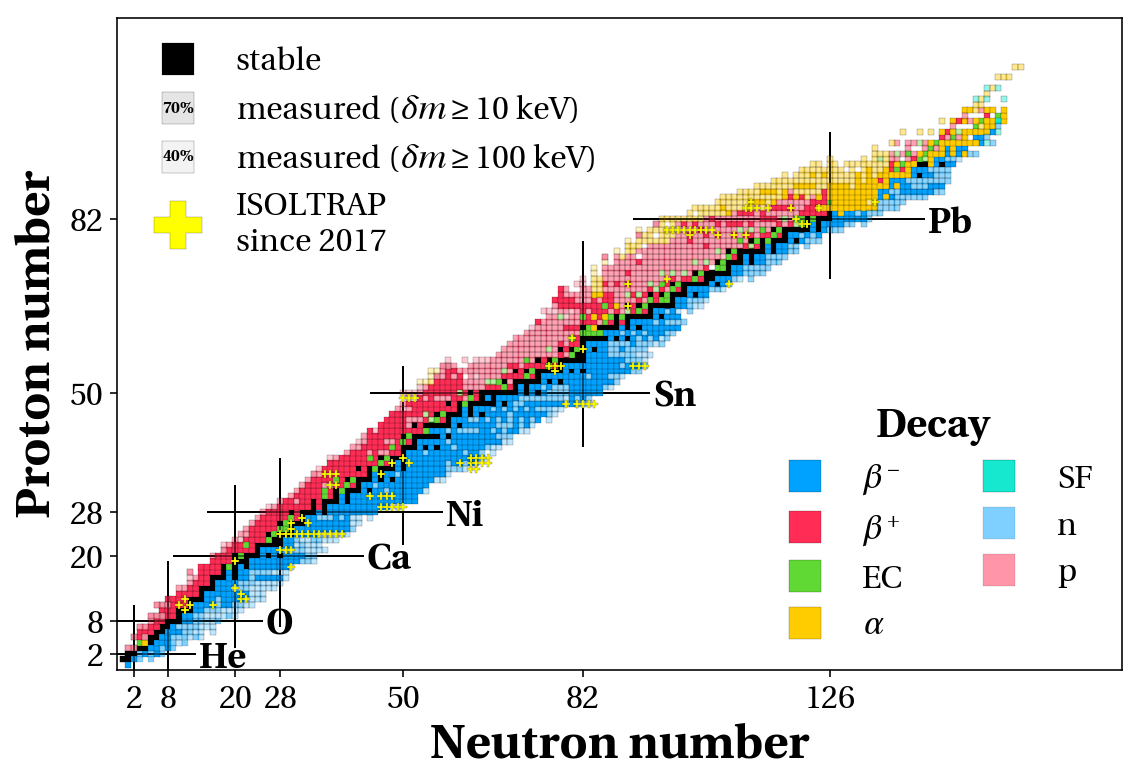

In [7]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(9,6))

# only measured values of ground states
limit = 100
limit2 = 10
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'IS')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='$\\beta^-$', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='$\\beta^+$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='EC', lw=0, marker='s', markersize=2.7, markerfacecolor='#61D935', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='$\\alpha$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC00', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='n', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='SF', lw=0, marker='s', markersize=2.7, markerfacecolor='#16E7CF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='measured ($\delta m \geq 10$ keV)', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='p', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')

# displaying [limit2]<x<[limit] keV uncertainty
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF70', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#61D93570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC0070', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF70', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#16E7CF70', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='measured ($\delta m \geq 100$ keV)', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5570', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
f.text(x=0.16,y=0.77,s='70%', fontweight='bold', fontsize=8)

# displaying x<[limit] keV uncertainty
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF40', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5540', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC0040', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF40', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E540', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5540', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
f.text(x=0.16,y=0.715,s='40%', fontweight='bold', fontsize=8)

# # displaying extrapolated values of ground states
# nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#00A2FF25', markeredgewidth=0.1, markeredgecolor='k')
# nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D5525', markeredgewidth=0.1, markeredgecolor='k')
# nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FFCC0025', markeredgewidth=0.1, markeredgecolor='k')
# nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#16E7CF25', markeredgewidth=0.1, markeredgecolor='k')
# nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k')
# nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D5525', markeredgewidth=0.1, markeredgecolor='k')

# inserting lines to display the magic numbers and adding the "magic elements"
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_el = ['He', 'O', 'Ca', 'Ni', 'Sn', 'Pb', 'Ubh']
for i in range(len(magic_nrs)):
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', linewidth=1)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', linewidth=1)
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.text(x=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5.5,
             y=magic_nrs[i]-2.5,
             s='{}'.format(magic_el[i]), fontweight='bold', fontsize=18)
    
# lists of measured or published masses since 2017 at the ISOLTRAP setup at CERN/ISOLDE
masses_2017__ = ['39K', '85Rb', '133Cs',    # offline source
                 '88Sr', '88Rb',    # 2017-05 ArKr
                 '127Cd', '129Cd', '130Cd', '131Cd', '132Cd',    # 2017-07 Cd
                 '131Cs',    # 2017-07 Cs
                 '48Ar', '98Kr', '99Kr',    # 2017-08 ArKr
                 '49Sc', '50Sc', '51Sc', '99In', '100In', '101In',    # 2018-04 ScIn
                 '70As', '71As', '71Br', '72Br', '73Br', '81Br']    # 2018-05 Br
publications_2017__ = ['27Na', '97Rb', '99Rb', '100Rb', '100Sr', '103Sr', '129Cd',    # R. Wolf - Nucl.Instrum. Meth. B 376, 275-280 (2016)
                       '132Cs', '146Cs', '147Cs', '148Cs',    # D. Atanasov - J. Phys. G 44, 064008 (2017)
                       '185Au', '197At', '219At', '180Au', '188Au', '190Au',    # V. Manea - Phys. Rev. C 95, 054322 (2017)
                       '100Sr', '101Sr', '102Sr', '100Rb', '101Rb', '102Rb',    # A. de Roubin - Phys. Rev. C 96, 014310 (2017)
                       '202Pb', '202Tl', '203Tl',    # A. Welker - Eur. Phys. J. A 53, 153 (2017)
                       '75Cu', '76Cu', '77Cu', '78Cu', '79Cu',    # A. Welker - Phys. Rev. Lett. 119, 192502 (2017)
                       '195Po', '196Po', '197Po', '199Po', '203Po', '208Po',    # N. Althubiti - Phys. Rev. C 96, 044325 (2017)
                       '58Cr', '59Cr', '60Cr', '61Cr', '62Cr', '63Cr',    # M. Mougeot - Phys. Rev. Lett. 120, 232501 (2018)
                       '177Hg', '178Hg', '179Hg', '180Hg', '181Hg', '182Hg', '183Hg', '184Hg', '185Hg',    # B. Marsh - Nature Physics 14, 1163 (2018) 
                       '131Cs', '131Xe',    # J. Karthein - Hyperfine Interact (2019) 240: 61
                       '52Cr', '53Cr', '54Cr', '55Cr', '56Cr', '57Cr', '55Mn', '56Fe', '59Fe', '59Co', '75Ga', '77Ga', '78Ga', '79Ga', '140Ce', '140Nd', '156Dy', '160Yb', '168Lu', '178Yb',    # W.J. Huang - Eur. Phys. J. A (2019) 55: 96.
                       '33Mg', '34Mg', '34Si', '34Al',    # P. Ascher - Phys. Rev. C 100, 014304 (2019)
                       '21Na', '21Ne', '23Mg', '23Na']    # J. Karthein - Phys. Rev. C 100, 015502 (2019)

# plotting those measured masses
ax.plot([i[0] for i in [nubase_df.N[nubase_df.index == i].tolist() for i in masses_2017__+publications_2017__]],
        [i[0] for i in [nubase_df.Z[nubase_df.index == i].tolist() for i in masses_2017__+publications_2017__]],
        marker='P', c='yellow', lw=0, zorder=50, label='ISOLTRAP\nsince 2017',
        markersize=4, markerfacecolor='yellow', markeredgewidth=0.1, markeredgecolor='k')

# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
plt.xticks(magic_nrs, magic_nrs)
plt.yticks(magic_nrs, magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)

plt.tick_params(labelsize=16)

handles, labels = ax.get_legend_handles_labels()    # allows splitting the legend
handles1 = [handles[1],handles[2],handles[3],handles[4],handles[6],handles[5],handles[8]]
handles2 = [handles[0],handles[7],handles[9],handles[10]]#,handles[11]]

lg1 = ax.legend(handles=handles1,loc=4,title = 'Decay', markerscale=6,fontsize=16, ncol=2, edgecolor='white')
plt.setp(lg1.get_title(),fontsize=20,fontweight='bold')    # legend title bold
plt.gca().add_artist(lg1)
lg2 = ax.legend(handles=handles2,loc=2,fontsize=16, markerscale=6, ncol=1, edgecolor='white', framealpha=0)
plt.setp(lg2.get_title(),fontsize=20,fontweight='bold')    # legend title bold

plt.savefig('nuclear-chart-precision-ISOLTRAP17.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

In [8]:
print('Measured isotopes',len(nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.extrapol == False)]))
print('Extrapolated isotopes',len(nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.extrapol == True)]))
print('Measured isomers',len(nubase_df[(nubase_df['Z_+'].str[3] != '0')&(nubase_df.extrapol == False)]))

Measured isotopes 2498
Extrapolated isotopes 938
Measured isomers 1821


# Nuclear char: mass precision & r-process path

posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


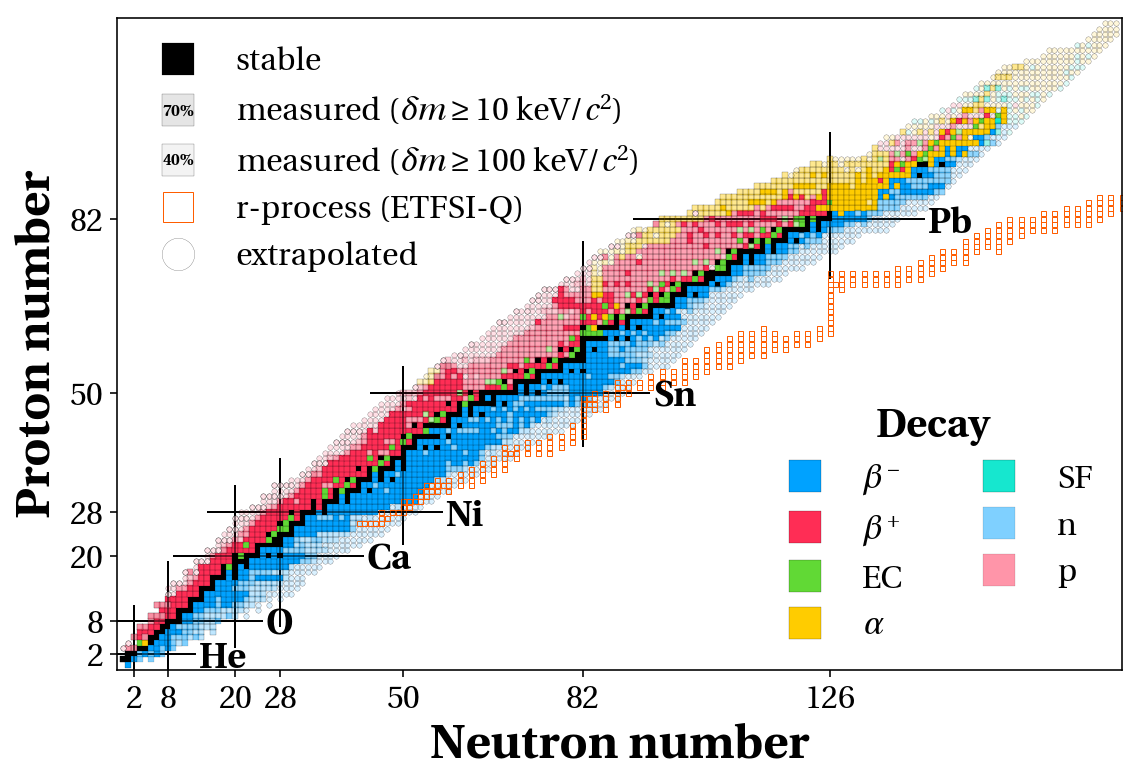

In [9]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(9,6))

# plot ISOLTRAP measurements (put isoltrap = True)
isoltrap = False

# only measured values of ground states
limit = 100
limit2 = 10
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'IS')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='$\\beta^-$', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='$\\beta^+$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='EC', lw=0, marker='s', markersize=2.7, markerfacecolor='#61D935', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='$\\alpha$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC00', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='n', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='SF', lw=0, marker='s', markersize=2.7, markerfacecolor='#16E7CF', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='measured ($\delta m \geq 10$ keV/$c^2$)', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV < limit2)].plot(x='N', y='Z', ax=ax, label='p', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')

# displaying [limit2]<x<[limit] keV uncertainty
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF70', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#61D93570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC0070', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF70', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#16E7CF70', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='measured ($\delta m \geq 100$ keV/$c^2$)', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E570', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit2)&(nubase_df.ME_unc_keV < limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5570', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
f.text(x=0.16,y=0.767,s='70%', fontweight='bold', fontsize=8)

# displaying x<[limit] keV uncertainty
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF40', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5540', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC0040', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF40', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E540', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)&(nubase_df.ME_unc_keV >= limit)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D5540', alpha=0.5, markeredgewidth=0.1, markeredgecolor='k')
f.text(x=0.16,y=0.71,s='40%', fontweight='bold', fontsize=8)

# displaying extrapolated values of ground states
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#00A2FF25', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D5525', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FFCC0025', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#16E7CF25', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D5525', markeredgewidth=0.1, markeredgecolor='k')

# inserting lines to display the magic numbers and adding the "magic elements"
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_el = ['He', 'O', 'Ca', 'Ni', 'Sn', 'Pb', 'Ubh']
for i in range(len(magic_nrs)):
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', linewidth=1)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', linewidth=1)
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.text(x=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5.5,
             y=magic_nrs[i]-2.5,
             s='{}'.format(magic_el[i]), fontweight='bold', fontsize=18)
    
# lists of measured or published masses since 2017 at the ISOLTRAP setup at CERN/ISOLDE
masses_2017__ = ['39K', '85Rb', '133Cs',    # offline source
                 '88Sr', '88Rb',    # 2017-05 ArKr
                 '127Cd', '129Cd', '130Cd', '131Cd', '132Cd',    # 2017-07 Cd
                 '131Cs',    # 2017-07 Cs
                 '48Ar', '98Kr', '99Kr',    # 2017-08 ArKr
                 '49Sc', '50Sc', '51Sc', '99In', '100In', '101In',    # 2018-04 ScIn
                 '70As', '71As', '71Br', '72Br', '73Br', '81Br']    # 2018-05 Br
publications_2017__ = ['27Na', '97Rb', '99Rb', '100Rb', '100Sr', '103Sr', '129Cd',    # R. Wolf - Nucl.Instrum. Meth. B 376, 275-280 (2016)
                       '132Cs', '146Cs', '147Cs', '148Cs',    # D. Atanasov - J. Phys. G 44, 064008 (2017)
                       '185Au', '197At', '219At', '180Au', '188Au', '190Au',    # V. Manea - Phys. Rev. C 95, 054322 (2017)
                       '100Sr', '101Sr', '102Sr', '100Rb', '101Rb', '102Rb',    # A. de Roubin - Phys. Rev. C 96, 014310 (2017)
                       '202Pb', '202Tl', '203Tl',    # A. Welker - Eur. Phys. J. A 53, 153 (2017)
                       '75Cu', '76Cu', '77Cu', '78Cu', '79Cu',    # A. Welker - Phys. Rev. Lett. 119, 192502 (2017)
                       '195Po', '196Po', '197Po', '199Po', '203Po', '208Po',    # N. Althubiti - Phys. Rev. C 96, 044325 (2017)
                       '58Cr', '59Cr', '60Cr', '61Cr', '62Cr', '63Cr',    # M. Mougeot - Phys. Rev. Lett. 120, 232501 (2018)
                       '177Hg', '178Hg', '179Hg', '180Hg', '181Hg', '182Hg', '183Hg', '184Hg', '185Hg',    # B. Marsh - Nature Physics 14, 1163 (2018) 
                       '131Cs', '131Xe',    # J. Karthein - Hyperfine Interact (2019) 240: 61
                       '52Cr', '53Cr', '54Cr', '55Cr', '56Cr', '57Cr', '55Mn', '56Fe', '59Fe', '59Co', '75Ga', '77Ga', '78Ga', '79Ga', '140Ce', '140Nd', '156Dy', '160Yb', '168Lu', '178Yb',    # W.J. Huang - Eur. Phys. J. A (2019) 55: 96.
                       '33Mg', '34Mg', '34Si', '34Al',    # P. Ascher - Phys. Rev. C 100, 014304 (2019)
                       '21Na', '21Ne', '23Mg', '23Na']    # J. Karthein - Phys. Rev. C 100, 015502 (2019)


# plotting those measured masses
if isoltrap:
    ax.plot([i[0] for i in [nubase_df.N[nubase_df.index == i].tolist() for i in masses_2017__+publications_2017__]],
            [i[0] for i in [nubase_df.Z[nubase_df.index == i].tolist() for i in masses_2017__+publications_2017__]],
            marker='P', c='yellow', lw=0, zorder=50, label='ISOLTRAP\nsince 2017',
            markersize=4, markerfacecolor='yellow', markeredgewidth=0.1, markeredgecolor='k')

# loading and plotting r-process waiting points, taken from ETFSI-Q
rpath = pd.read_csv('bin/etfsi-r-process-path.csv', header=0)
rpath.plot(x='N', y='Z', ax=ax, label='r-process (ETFSI-Q)', lw=0, marker='s', markersize=2.5, markerfacecolor='#6FF1E900', markeredgewidth=0.5, markeredgecolor='#FF5D00')#C177DA



# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
plt.xticks(magic_nrs, magic_nrs)
plt.yticks(magic_nrs, magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)

plt.tick_params(labelsize=16)

handles, labels = ax.get_legend_handles_labels()    # allows splitting the legend
handles1 = [handles[1],handles[2],handles[3],handles[4],handles[6],handles[5],handles[8]]
if isoltrap:
    handles2 = [handles[0],handles[7],handles[9],handles[12],handles[10],handles[11]]
else:
    handles2 = [handles[0],handles[7],handles[9],handles[11],handles[10]]

lg1 = ax.legend(handles=handles1,loc=4,title = 'Decay', markerscale=6,fontsize=16, ncol=2, edgecolor='white')
plt.setp(lg1.get_title(),fontsize=20,fontweight='bold')    # legend title bold
plt.gca().add_artist(lg1)
lg2 = ax.legend(handles=handles2,loc=2,fontsize=16, markerscale=6, ncol=1, edgecolor='white', framealpha=0)
plt.setp(lg2.get_title(),fontsize=20,fontweight='bold')    # legend title bold

plt.savefig('nuclear-chart-r-path.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# Carbon cluster coverage

posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


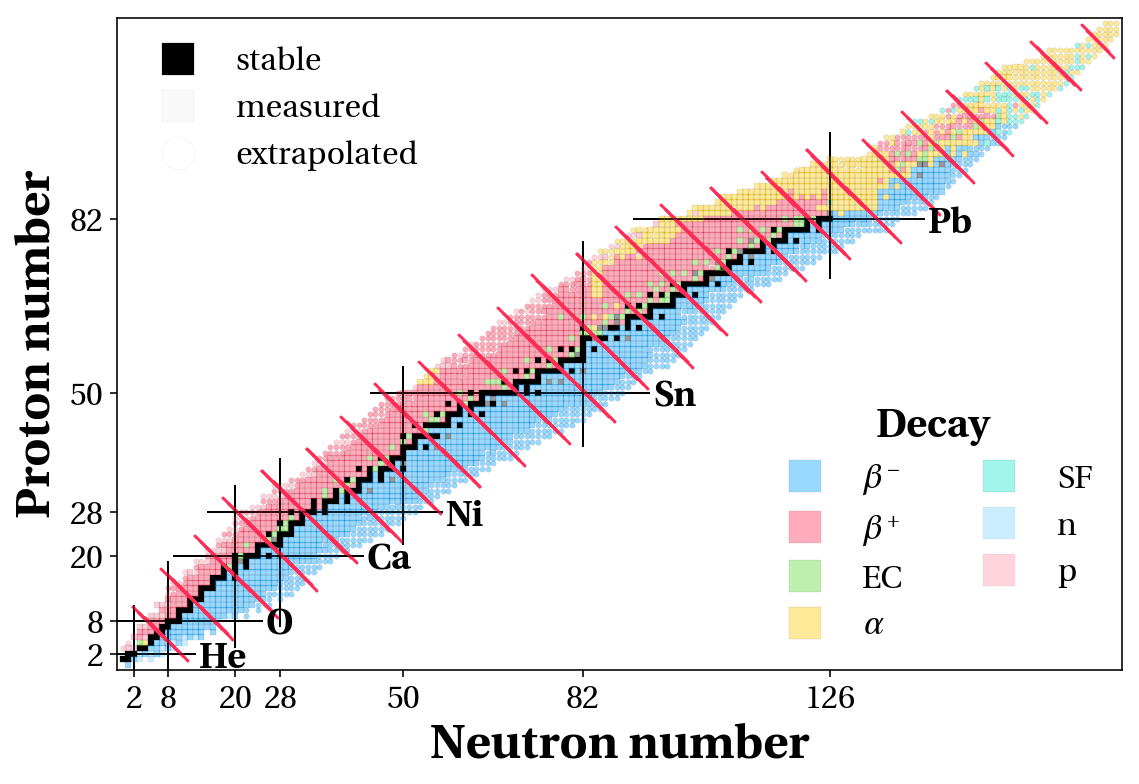

In [10]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(9,6))

alpha_c = 0.4

# only measured values of ground states
nubase_df[(nubase_df.t_1_2 == 'stbl')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='stable', lw=0, marker='s', markersize=2.7, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'IS')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='k', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\beta^-$', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\beta^+$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'EC')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='EC', lw=0, marker='s', markersize=2.7, markerfacecolor='#61D935', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'e+')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='$\\alpha$', lw=0, marker='s', markersize=2.7, markerfacecolor='#FFCC00', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'n')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='n', lw=0, marker='s', markersize=2.7, markerfacecolor='#00A2FF', alpha=alpha_c*0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='SF', lw=0, marker='s', markersize=2.7, markerfacecolor='#16E7CF', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='measured', lw=0, marker='s', markersize=2.7, markerfacecolor='#E5E5E5', alpha=alpha_c*0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == False)].plot(x='N', y='Z', ax=ax, label='p', lw=0, marker='s', markersize=2.7, markerfacecolor='#FF2D55', alpha=alpha_c*0.5, markeredgewidth=0.1, markeredgecolor='k')

# displaying extrapolated values of ground states
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B-')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#00A2FF', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'B+')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D55', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'A')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FFCC00', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0:2] == 'SF')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#16E7CF', alpha=alpha_c, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='extrapolated', lw=0, marker='o', markersize=2.7, markerfacecolor='white', alpha=alpha_c*0.5, markeredgewidth=0.1, markeredgecolor='k')
nubase_df[(nubase_df['Z_+'].str[3] == '0')&(nubase_df.decay.str[0] == 'p')&(nubase_df.extrapol == True)].plot(x='N', y='Z', ax=ax, label='_nolegend_', lw=0, marker='o', markersize=2.7, markerfacecolor='#FF2D55', alpha=alpha_c*0.5, markeredgewidth=0.1, markeredgecolor='k')

# marking the mass range of carbon clusters
nubase_df[(nubase_df.A % 12 == 0)].plot(x='N', y='Z', ax=ax, lw=0, marker=[(1,-1), (1.1,-0.9), (-0.9,1.1), (-1,1)], markersize=15, c='#FF2D55', mec=None, label='C cluster')

# inserting lines to display the magic numbers and adding the "magic elements"
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_el = ['He', 'O', 'Ca', 'Ni', 'Sn', 'Pb', 'Ubh']
for i in range(len(magic_nrs)):
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', linewidth=1)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', linewidth=1)
    plt.hlines(y=magic_nrs[i], xmin=nubase_df[nubase_df.Z == magic_nrs[i]].N.min()-5, xmax=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.vlines(x=magic_nrs[i], ymin=nubase_df[nubase_df.N == magic_nrs[i]].Z.min()-5, ymax=nubase_df[nubase_df.N == magic_nrs[i]].Z.max()+5, color='k', alpha=0.5, linewidth=1, zorder=50)
    plt.text(x=nubase_df[nubase_df.Z == magic_nrs[i]].N.max()+5.5,
             y=magic_nrs[i]-2.5,
             s='{}'.format(magic_el[i]), fontweight='bold', fontsize=18)
    
# standardized figure parameters
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('Proton number', fontsize=24, fontweight='bold')
plt.xticks(magic_nrs, magic_nrs)
plt.yticks(magic_nrs, magic_nrs)
ax.set_xlim(-1, nubase_df.N.max()+1)
ax.set_ylim(-1, nubase_df.Z.max()+1)

plt.tick_params(labelsize=16)

handles, labels = ax.get_legend_handles_labels()    # allows splitting the legend
handles1 = [handles[1],handles[2],handles[3],handles[4],handles[6],handles[5],handles[8]]
handles2 = [handles[0],handles[7],handles[9]]

lg1 = ax.legend(handles=handles1,loc=4,title = 'Decay', markerscale=6,fontsize=16, ncol=2, edgecolor='white')
plt.setp(lg1.get_title(),fontsize=20,fontweight='bold')    # legend title bold
plt.gca().add_artist(lg1)
lg2 = ax.legend(handles=handles2,loc=2,fontsize=16, markerscale=6, ncol=1, edgecolor='white')
plt.setp(lg2.get_title(),fontsize=20,fontweight='bold')    # legend title bold

plt.savefig('nuclear-chart-carbon-clusters.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# $E_B$ plot

'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-BoldItalic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-BoldItalic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


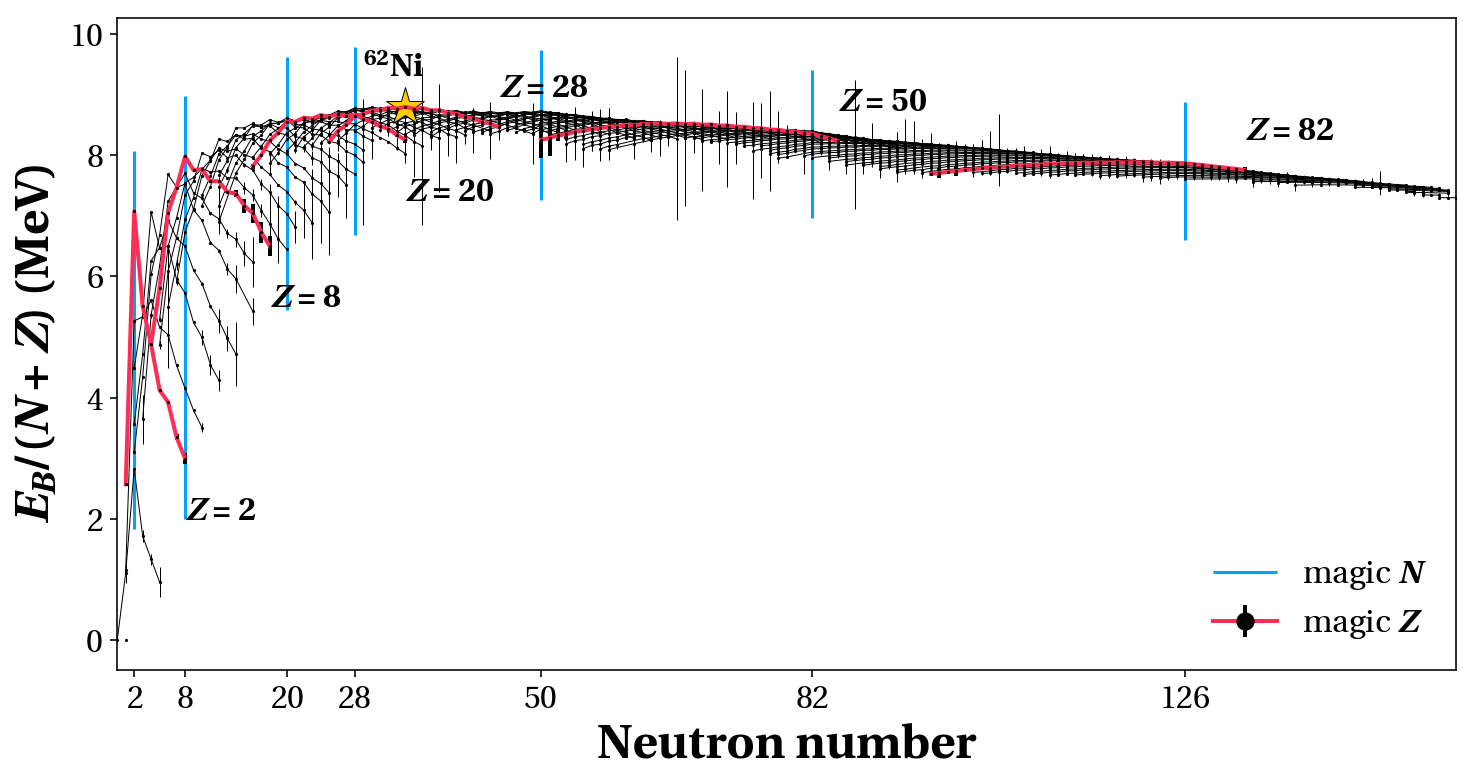

In [11]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.constants import physical_constants

import warnings
warnings.filterwarnings('ignore')

u = physical_constants['atomic mass constant energy equivalent in MeV'][0]
m_p = physical_constants['proton mass energy equivalent in MeV'][0]
m_n = physical_constants['neutron mass energy equivalent in MeV'][0]
m_e = physical_constants['electron mass energy equivalent in MeV'][0]

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro:bold',
       it='Linguistics Pro:italic:bold',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax = plt.subplots(1,1,figsize=(12,6))

# calculating S2N and uncertainties
nubase_df['EB'] = 0.0
nubase_df['EB_unc'] = 0.0
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_EB_dict = {2:[],8:[],20:[],28:[],50:[],82:[],126:[]}
eb_max = []

# plot EB for experimental values
for z,df_z in nubase_df[(nubase_df['Z_+'].str[3] == '0')].groupby('Z'):
    df_z.EB = -(df_z.ME_keV/1000 + df_z.A * u - (df_z.N * m_n + df_z.Z * m_p + df_z.Z * m_e))/df_z.A
    df_z.EB_unc = df_z.ME_unc_keV/1000
    eb_max.append([df_z.EB.idxmax(), df_z.N[df_z.EB.idxmax()], df_z.EB.max()])
    # save magic-N-S2N
    for n in magic_nrs:
        if df_z[(df_z.N == n)&(nubase_df.extrapol == False)].EB.empty == False:
            magic_EB_dict[n].append(df_z[(df_z.N == n)].EB[0])
    # plot S2N in black, except for magic-Z -> red
    if z in magic_nrs[:3]:
        df_z[(nubase_df.extrapol == False)].plot(x='N', y='EB', yerr='EB_unc', ax=ax, zorder=50,
                                                 label='magic $Z$', lw=2, c='#FF2D55', marker='o',
                                                 markersize=1.5, markerfacecolor='k', markeredgewidth=0.1,
                                                 markeredgecolor='k',ecolor='k')
        plt.text(x=df_z[(nubase_df.extrapol == False)].N.max(),
                 y=df_z[(nubase_df.extrapol == False)].EB[df_z[(nubase_df.extrapol == False)].N.idxmax()]-1,
                 s='$Z$ = {}'.format(z), fontweight='bold', fontsize=16)
    elif z in magic_nrs[3:]:
        df_z[(nubase_df.extrapol == False)].plot(x='N', y='EB', yerr='EB_unc', ax=ax, zorder=50,
                                                 label='magic $Z$', lw=2, c='#FF2D55', marker='o',
                                                 markersize=1.5, markerfacecolor='k', markeredgewidth=0.1,
                                                 markeredgecolor='k',ecolor='k')
        plt.text(x=df_z[(nubase_df.extrapol == False)].N.max(),
                 y=df_z[(nubase_df.extrapol == False)].EB[df_z[(nubase_df.extrapol == False)].N.idxmax()]+0.5,
                 s='$Z$ = {}'.format(z), fontweight='bold', fontsize=16)

    else:
        try:
            df_z[(nubase_df.extrapol == False)].plot(x='N', y='EB', yerr='EB_unc', zorder=1,
                                                    ax=ax, label='_nolegend_', lw=0.5,c='k',
                                                    marker='o', markersize=1.5, markerfacecolor='k',
                                                    markeredgewidth=0.1, markeredgecolor='k')
        except:
            pass       

eb_max = pd.DataFrame(eb_max, columns=['el','N','EB_max'])
eb_max[eb_max.EB_max == eb_max.EB_max.max()].plot(x='N',y='EB_max', ax=ax, c='#FFCC00',
                                                  marker='*', label='_nolegend_', markersize=20,
                                                  markeredgewidth=0.5, markeredgecolor='k')
plt.text(x=eb_max.N[eb_max.EB_max == eb_max.EB_max.max()]-5,
         y=eb_max.EB_max.max()+0.5,
         s='$^{62}$Ni', fontweight='bold', fontsize=16)
        
# inserting lines to display the magic numbers
for n in magic_nrs:
    plt.vlines(x=n, ymin=min(magic_EB_dict[n])-1, ymax=max(magic_EB_dict[n])+1,
               color='#00A2FF',linewidth=1.5, zorder=1, label='magic $N$')

# standardized figure parameters
plt.tick_params(labelsize=16)
ax.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax.set_ylabel('$E_{B} / (N+Z)$ (MeV)', fontsize=24, fontweight='bold')
ax.set_xticks(magic_nrs)

ax.set_xlim(0,158)

handles, labels = ax.get_legend_handles_labels()    # allows splitting the legend
handles1 = [handles[0],handles[-1]]

lg1 = ax.legend(handles=handles1,loc=4, markerscale=6,fontsize=16, ncol=1, edgecolor='white')
plt.setp(lg1.get_title(),fontsize=20,fontweight='bold')    # legend title bold
plt.gca().add_artist(lg1)

plt.savefig('EB.pdf',bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()

# $S_{1n}$ plot

'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-BoldItalic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-BoldItalic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


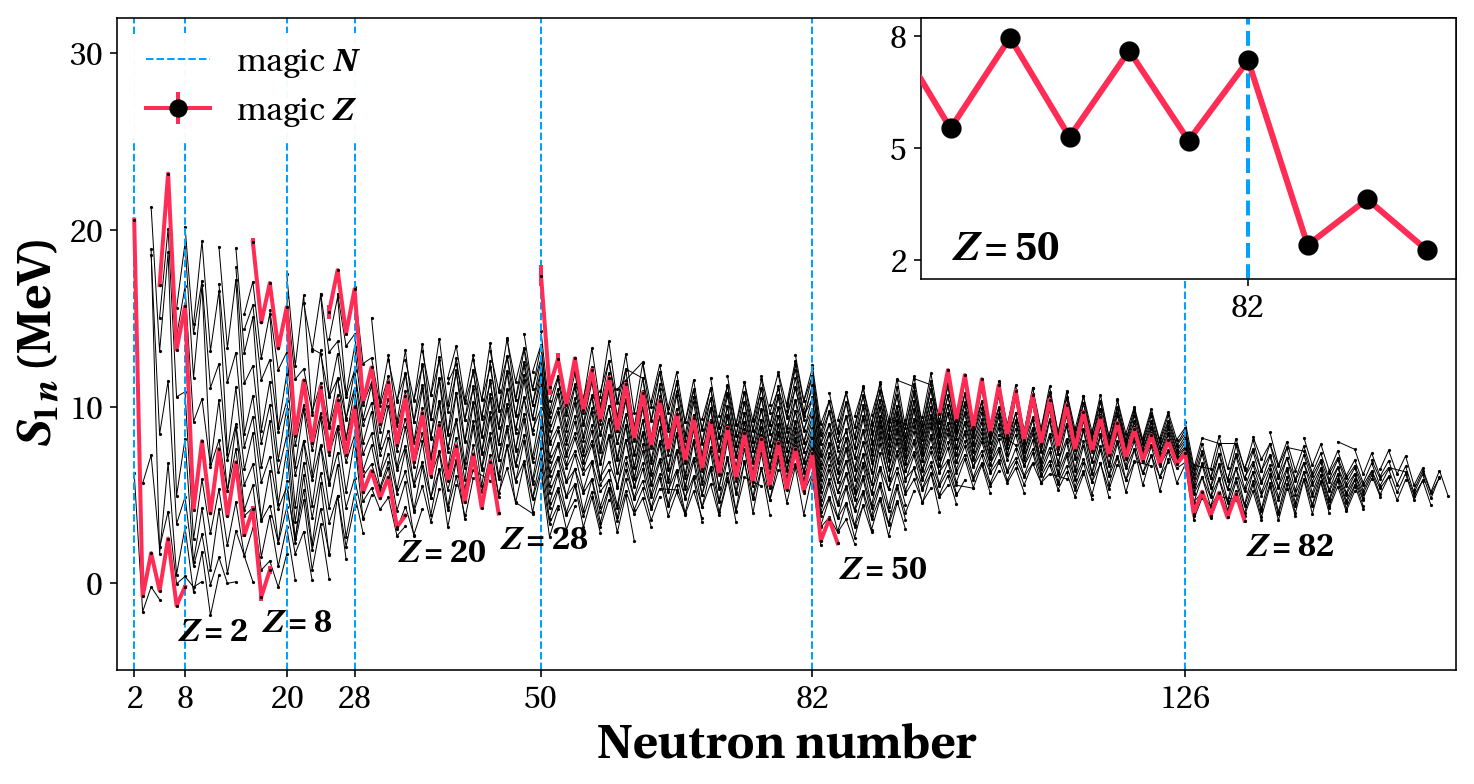

In [12]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.constants import physical_constants

import warnings
warnings.filterwarnings('ignore')

# u = physical_constants['atomic mass constant energy equivalent in MeV'][0]
m_p = physical_constants['proton mass energy equivalent in MeV'][0]
m_n = physical_constants['neutron mass energy equivalent in MeV'][0]

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro:bold',
       it='Linguistics Pro:italic:bold',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax2 = plt.subplots(1,1,figsize=(12,6))

ax2in = ax2.inset_axes([0.6,0.6,0.4,0.4])

# calculating S1N
nubase_df['s1n'] = 0.0
nubase_df['s1n_unc'] = 0.0
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_s1n_dict = {2:[],8:[],20:[],28:[],50:[],82:[],126:[]}

for z,df_z in nubase_df[(nubase_df['Z_+'].str[3] == '0')].groupby('Z'):
    df_z.s1n = df_z.ME_keV.shift(1)/1000 - df_z.ME_keV/1000 + nubase_df.ME_keV['1 n']/1000
    df_z.s1n_unc = np.sqrt((df_z.ME_unc_keV.shift(1)/1000).pow(2)
                           + (df_z.ME_unc_keV/1000).pow(2)
                           + (nubase_df.ME_unc_keV['1 n']/1000)**2)
    # save magic-N-S1N
    for n in magic_nrs:
        if df_z[(df_z.N == n)&(nubase_df.extrapol == False)].s1n.empty == False:
            magic_s1n_dict[n].append(df_z[df_z.N == n].s1n[0])
    # plot S1N in black, except for magic-Z -> red
    if z in magic_nrs:
        df_z[(nubase_df.extrapol == False)].plot(x='N', y='s1n', yerr='s1n_unc', ax=ax2, label='magic $Z$', lw=2, c='#FF2D55', marker='o',
                  markersize=1.5, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k', zorder=50)
        ax2.text(x=df_z[(nubase_df.extrapol == False)].N[df_z[(nubase_df.extrapol == False)].s1n.idxmin()],
                 y=df_z[(nubase_df.extrapol == False)].s1n.min()-2,s='$Z$ = {}'.format(z),
                 fontweight='bold', fontsize=16)
        if z == 50:
            df_z[(nubase_df.extrapol == False)].plot(x='N', y='s1n', ax=ax2in, label='magic $Z$', lw=3, c='#FF2D55', marker='o',
                      markersize=10, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k', zorder=50)            
    else:
        try:
            df_z[(nubase_df.extrapol == False)&(df_z.Z < 101)].iloc[2:].plot(x='N', y='s1n', ax=ax2, label='_nolegend_', lw=0.5, c='k', marker='o',
                      markersize=1.5, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k', zorder=1)
        except:
            pass
        
# inserting lines to display the magic numbers
for magic in magic_nrs:
    ax2.axvline(x=magic, color='#00A2FF',linestyle='--', linewidth=1, zorder=1, label='magic $N$')
       
# standardized figure parameters
ax2.tick_params(labelsize=16)
ax2.minorticks_off()
ax2.get_legend().remove()
ax2.set_ylim(-4.9, 32)
ax2.set_yticks([0,10,20, 30])

# inlet parameters
ax2in.set_xlim(76.5, 85.5)
ax2in.set_ylim(1.5, 8.5)
ax2in.set_xticks([82])
ax2in.set_yticks([2,5,8])
ax2in.set_xlabel('')
ax2in.tick_params(labelsize=16)
ax2in.text(x=77,y=2,s='$Z=50$',fontweight='bold',fontsize=20)
ax2in.axvline(x=82, color='#00A2FF',linestyle='--', linewidth=2, zorder=1)
ax2in.get_legend().remove()
       
# standardized figure parameters
ax2.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax2.set_ylabel('$S_{1n}$ (MeV)', fontsize=24, fontweight='bold')
ax2.set_xticks(magic_nrs)

ax2.set_xlim(0,158)

handles, labels = ax2.get_legend_handles_labels()    # allows splitting the legend
handles1 = [handles[0],handles[-1]]

lg1 = ax2.legend(handles=handles1,loc=2, markerscale=6,fontsize=16, ncol=1, edgecolor='white')
plt.setp(lg1.get_title(),fontsize=20,fontweight='bold')    # legend title bold
plt.gca().add_artist(lg1)

plt.savefig('s1n.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# $S_{2n}$ plot

'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-BoldItalic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-BoldItalic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


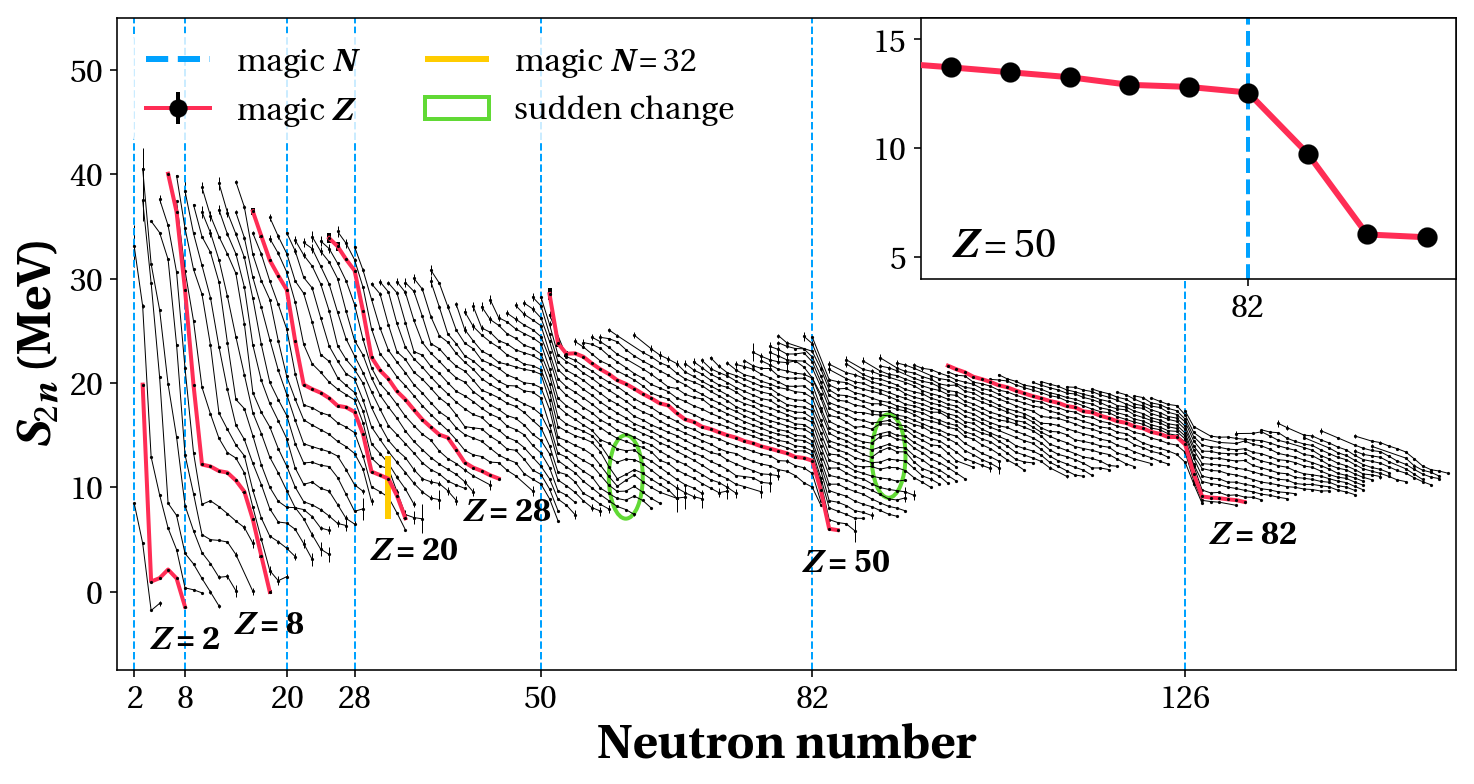

In [13]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.constants import physical_constants

import warnings
warnings.filterwarnings('ignore')

# u = physical_constants['atomic mass constant energy equivalent in MeV'][0]
m_p = physical_constants['proton mass energy equivalent in MeV'][0]
m_n = physical_constants['neutron mass energy equivalent in MeV'][0]

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic:bold',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, ax3 = plt.subplots(1,1,figsize=(12,6))

ax3in = ax3.inset_axes([0.6,0.6,0.4,0.4])

# calculating S2N and uncertainties
nubase_df['s2n'] = 0.0
nubase_df['s2n_unc'] = 0.0
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_s2n_dict = {2:[],8:[],20:[],28:[],50:[],82:[],126:[]}

# plot s2n for experimental values
for z,df_z in nubase_df[(nubase_df['Z_+'].str[3] == '0')].groupby('Z'):
    df_z.s2n = df_z.ME_keV.shift(2)/1000 - df_z.ME_keV/1000 + nubase_df.ME_keV['1 n']/1000 * 2
    df_z.s2n_unc = np.sqrt((df_z.ME_unc_keV.shift(2)/1000).pow(2)
                           + (df_z.ME_unc_keV/1000).pow(2)
                           + (nubase_df.ME_unc_keV['1 n']/1000 * 2)**2)
    # save magic-N-S2N
    for n in magic_nrs:
        if df_z[(df_z.N == n)&(nubase_df.extrapol == False)].s2n.empty == False:
            magic_s2n_dict[n].append(df_z[(df_z.N == n)].s2n[0])
    # plot S2N in black, except for magic-Z -> red
    if z in magic_nrs:
        df_z[(nubase_df.extrapol == False)].plot(x='N', y='s2n', yerr='s2n_unc', ax=ax3,
                                                 label='magic $Z$', lw=2, c='#FF2D55', marker='o',
                                                 markersize=1.5, markerfacecolor='k', markeredgewidth=0.1,
                                                 markeredgecolor='k',ecolor='k', zorder=50)
        ax3.text(x=df_z[(nubase_df.extrapol == False)].N.max()-4.3,
                 y=df_z[(nubase_df.extrapol == False)].s2n[df_z[(nubase_df.extrapol == False)].N.idxmax()]-4,
                 s='$Z$ = {}'.format(z), fontweight='bold', fontsize=16)
        if z == 50:
            df_z[(nubase_df.extrapol == False)].plot(x='N', y='s2n', yerr='s2n_unc', ax=ax3in,
                                                 label='magic $Z$', lw=3, c='#FF2D55', marker='o',
                                                 markersize=10, markerfacecolor='k', markeredgewidth=0.1,
                                                 markeredgecolor='k',ecolor='k', zorder=50)
    else:
        try:
            df_z[(nubase_df.extrapol == False)&(df_z.Z < 101)].plot(x='N', y='s2n', yerr='s2n_unc', zorder=1,
                                                                    ax=ax3, label='_nolegend_', lw=0.5,c='k',
                                                                    marker='o', markersize=1.5, markerfacecolor='k',
                                                                    markeredgewidth=0.1, markeredgecolor='k')
        except:
            pass
        
# inserting lines to display the magic numbers
for n in magic_nrs:
#     ax3.vlines(x=n, ymin=min(magic_s2n_dict[n])-2.5, ymax=max(magic_s2n_dict[n])+2.5,
#                color='#00A2FF',linewidth=1.5, zorder=1, label='magic $N$')
    ax3.axvline(x=n, color='#00A2FF',linestyle='--', linewidth=1, zorder=1, label='magic $N$')
    

# areas of sudden change and magic N=32
ellipse1 = mpl.patches.Ellipse(xy=(60, 11), width=4, height=8, edgecolor='#61D935',
                               fc='None', lw=2, label='sudden change')
ellipse2 = mpl.patches.Ellipse(xy=(91, 13), width=4, height=8, edgecolor='#61D935',
                               fc='None', lw=2)
ax3.add_patch(ellipse1)
ax3.add_patch(ellipse2)
ax3.vlines(x=32, ymin=7, ymax=13, color='#FFCC00', linewidth=3, label='magic $N=32$')


# standardized figure parameters
ax3.tick_params(labelsize=16)
ax3.minorticks_off()
ax3.set_ylabel('$S_{2n}$ (MeV)', fontsize=24, fontweight='bold')
ax3.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax3.set_xticks(magic_nrs)
ax3.set_xlim(0,158)
ax3.set_ylim(-7.5, 55)



# inlet parameters
ax3in.set_xlim(76.5, 85.5)
ax3in.set_ylim(4, 16)
ax3in.set_xticks([82])
ax3in.set_yticks([5,10,15])
ax3in.set_xlabel('')
ax3in.tick_params(labelsize=16)
ax3in.text(x=77,y=5,s='$Z=50$',fontweight='bold',fontsize=20)
ax3in.axvline(x=82, color='#00A2FF',linestyle='--', linewidth=2, zorder=1)

handles, labels = ax3.get_legend_handles_labels()    # allows splitting the legend
handles1 = [handles[1],handles[-1],handles[-7],handles[-8]]

lg1 = ax3.legend(handles=handles1,loc=2, markerscale=6,fontsize=16, ncol=2, edgecolor='white', facecolor='white')
plt.setp(lg1.get_title(),fontsize=20,fontweight='bold')    # legend title bold

for line in lg1.get_lines():    # increase legend linewidth
    line.set_linewidth(3)

ax3in.get_legend().remove()

plt.savefig('s2n.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# $E_B, S_{\textit{1n}}, S_{\textit{2n}}$

'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-BoldItalic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-BoldItalic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


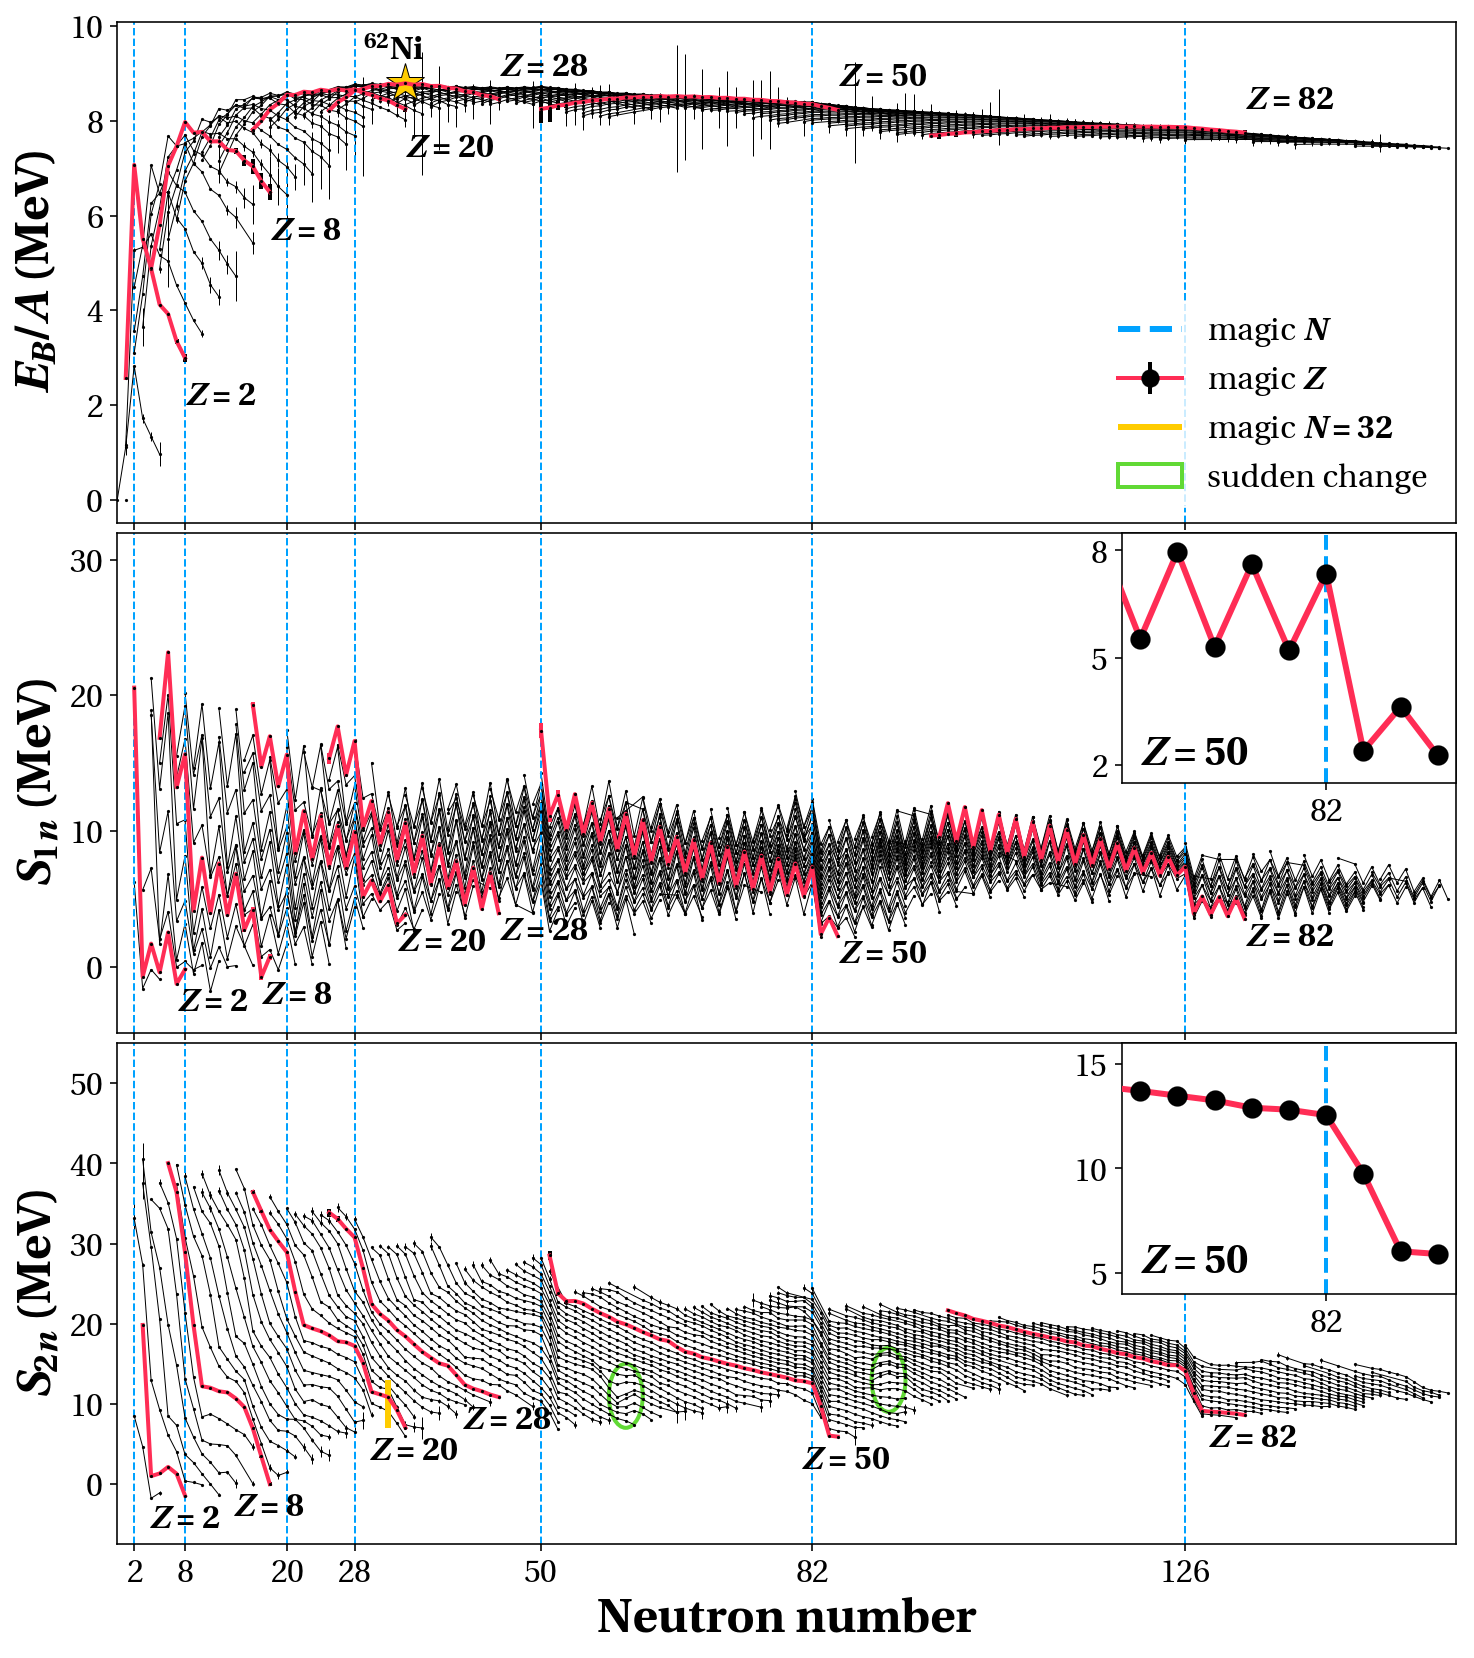

In [14]:
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.constants import physical_constants

import warnings
warnings.filterwarnings('ignore')

u = physical_constants['atomic mass constant energy equivalent in MeV'][0]
m_p = physical_constants['proton mass energy equivalent in MeV'][0]
m_n = physical_constants['neutron mass energy equivalent in MeV'][0]
m_e = physical_constants['electron mass energy equivalent in MeV'][0]

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro:bold',
       it='Linguistics Pro:italic:bold',
       bf='Linguistics Pro:bold')

# plotting the different decay modes
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(12,14),sharex=True,
                                  gridspec_kw={'hspace': 0.02})


################################
# E_B
################################

# calculating S2N and uncertainties
nubase_df['EB'] = 0.0
nubase_df['EB_unc'] = 0.0
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_EB_dict = {2:[],8:[],20:[],28:[],50:[],82:[],126:[]}
eb_max = []

# plot EB for experimental values
for z,df_z in nubase_df[(nubase_df['Z_+'].str[3] == '0')].groupby('Z'):
    df_z.EB = -(df_z.ME_keV/1000 + df_z.A * u - (df_z.N * m_n + df_z.Z * m_p + df_z.Z * m_e))/df_z.A
    df_z.EB_unc = df_z.ME_unc_keV/1000
    eb_max.append([df_z.EB.idxmax(), df_z.N[df_z.EB.idxmax()], df_z.EB.max()])
    # save magic-N-S2N
    for n in magic_nrs:
        if df_z[(df_z.N == n)&(nubase_df.extrapol == False)].EB.empty == False:
            magic_EB_dict[n].append(df_z[(df_z.N == n)].EB[0])
    # plot S2N in black, except for magic-Z -> red
    if z in magic_nrs[:3]:
        df_z[(nubase_df.extrapol == False)].plot(x='N', y='EB', yerr='EB_unc', ax=ax1, zorder=50,
                                                 label='magic $Z$', lw=2, c='#FF2D55', marker='o',
                                                 markersize=1.5, markerfacecolor='k', markeredgewidth=0.1,
                                                 markeredgecolor='k',ecolor='k')
        ax1.text(x=df_z[(nubase_df.extrapol == False)].N.max(),
                 y=df_z[(nubase_df.extrapol == False)].EB[df_z[(nubase_df.extrapol == False)].N.idxmax()]-1,
                 s='$Z$ = {}'.format(z), fontweight='bold', fontsize=16)
    elif z in magic_nrs[3:]:
        df_z[(nubase_df.extrapol == False)].plot(x='N', y='EB', yerr='EB_unc', ax=ax1, zorder=50,
                                                 label='magic $Z$', lw=2, c='#FF2D55', marker='o',
                                                 markersize=1.5, markerfacecolor='k', markeredgewidth=0.1,
                                                 markeredgecolor='k',ecolor='k')
        ax1.text(x=df_z[(nubase_df.extrapol == False)].N.max(),
                 y=df_z[(nubase_df.extrapol == False)].EB[df_z[(nubase_df.extrapol == False)].N.idxmax()]+0.5,
                 s='$Z$ = {}'.format(z), fontweight='bold', fontsize=16)

    else:
        try:
            df_z[(nubase_df.extrapol == False)&(df_z.Z < 101)].plot(x='N', y='EB', yerr='EB_unc', zorder=1,
                                                    ax=ax1, label='_nolegend_', lw=0.5,c='k',
                                                    marker='o', markersize=1.5, markerfacecolor='k',
                                                    markeredgewidth=0.1, markeredgecolor='k')
        except:
            pass       

eb_max = pd.DataFrame(eb_max, columns=['el','N','EB_max'])
eb_max[eb_max.EB_max == eb_max.EB_max.max()].plot(x='N',y='EB_max', ax=ax1, c='#FFCC00',
                                                  marker='*', label='_nolegend_', markersize=20,
                                                  markeredgewidth=0.5, markeredgecolor='k')
ax1.text(x=eb_max.N[eb_max.EB_max == eb_max.EB_max.max()]-5,
         y=eb_max.EB_max.max()+0.5,
         s='$^{62}$Ni', fontweight='bold', fontsize=16)
        
# inserting lines to display the magic numbers
for n in magic_nrs:
#     ax1.vlines(x=n, ymin=min(magic_EB_dict[n])-1, ymax=max(magic_EB_dict[n])+1,
#                color='#00A2FF',linewidth=1.5, zorder=1, label='magic $N$')
    ax1.axvline(x=n, color='#00A2FF',linestyle='--', linewidth=1, zorder=1, label='magic $N$')
    

# standardized figure parameters
ax1.tick_params(labelsize=16)
ax1.minorticks_off()
ax1.set_ylabel('$E_{B} / A$ (MeV)', fontsize=24, fontweight='bold')



################################
# s1n
################################

ax2in = ax2.inset_axes([0.75,0.5,0.25,0.5])

# calculating S1N
nubase_df['s1n'] = 0.0
nubase_df['s1n_unc'] = 0.0
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_s1n_dict = {2:[],8:[],20:[],28:[],50:[],82:[],126:[]}

for z,df_z in nubase_df[(nubase_df['Z_+'].str[3] == '0')].groupby('Z'):
    df_z.s1n = df_z.ME_keV.shift(1)/1000 - df_z.ME_keV/1000 + nubase_df.ME_keV['1 n']/1000
    df_z.s1n_unc = np.sqrt((df_z.ME_unc_keV.shift(1)/1000).pow(2)
                           + (df_z.ME_unc_keV/1000).pow(2)
                           + (nubase_df.ME_unc_keV['1 n']/1000)**2)
    # save magic-N-S1N
    for n in magic_nrs:
        if df_z[(df_z.N == n)&(nubase_df.extrapol == False)].s1n.empty == False:
            magic_s1n_dict[n].append(df_z[df_z.N == n].s1n[0])
    # plot S1N in black, except for magic-Z -> red
    if z in magic_nrs:
        df_z[(nubase_df.extrapol == False)].plot(x='N', y='s1n', yerr='s1n_unc', ax=ax2, label='magic $Z$', lw=2, c='#FF2D55', marker='o',
                  markersize=1.5, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k', zorder=50)
        ax2.text(x=df_z[(nubase_df.extrapol == False)].N[df_z[(nubase_df.extrapol == False)].s1n.idxmin()],
                 y=df_z[(nubase_df.extrapol == False)].s1n.min()-2,s='$Z$ = {}'.format(z),
                 fontweight='bold', fontsize=16)
        if z == 50:
            df_z[(nubase_df.extrapol == False)].plot(x='N', y='s1n', ax=ax2in, label='magic $Z$', lw=3, c='#FF2D55', marker='o',
                      markersize=10, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k', zorder=50)            
    else:
        try:
            df_z[(nubase_df.extrapol == False)&(df_z.Z < 101)].iloc[2:].plot(x='N', y='s1n', ax=ax2, label='_nolegend_', lw=0.5, c='k', marker='o',
                      markersize=1.5, markerfacecolor='k', markeredgewidth=0.1, markeredgecolor='k', zorder=1)
        except:
            pass
        
# inserting lines to display the magic numbers
for magic in magic_nrs:
    ax2.axvline(x=magic, color='#00A2FF',linestyle='--', linewidth=1, zorder=1, label='magic $N$')
       
# standardized figure parameters
ax2.tick_params(labelsize=16)
ax2.minorticks_off()
ax2.set_ylabel('$S_{\mathit{1}n}$ (MeV)', fontsize=24, fontweight='bold')
ax2.get_legend().remove()
ax2.set_ylim(-4.9, 32)
ax2.set_yticks([0,10,20, 30])

# inlet parameters
ax2in.set_xlim(76.5, 85.5)
ax2in.set_ylim(1.5, 8.5)
ax2in.set_xticks([82])
ax2in.set_yticks([2,5,8])
ax2in.set_xlabel('')
ax2in.tick_params(labelsize=16)
ax2in.text(x=77,y=2,s='$Z=50$',fontweight='bold',fontsize=20)
ax2in.axvline(x=82, color='#00A2FF',linestyle='--', linewidth=2, zorder=1)
ax2in.get_legend().remove()

################################
# s2n
################################

ax3in = ax3.inset_axes([0.75,0.5,0.25,0.5])

# calculating S2N and uncertainties
nubase_df['s2n'] = 0.0
nubase_df['s2n_unc'] = 0.0
magic_nrs = [2, 8, 20, 28, 50, 82, 126]
magic_s2n_dict = {2:[],8:[],20:[],28:[],50:[],82:[],126:[]}

# plot s2n for experimental values
for z,df_z in nubase_df[(nubase_df['Z_+'].str[3] == '0')].groupby('Z'):
    df_z.s2n = df_z.ME_keV.shift(2)/1000 - df_z.ME_keV/1000 + nubase_df.ME_keV['1 n']/1000 * 2
    df_z.s2n_unc = np.sqrt((df_z.ME_unc_keV.shift(2)/1000).pow(2)
                           + (df_z.ME_unc_keV/1000).pow(2)
                           + (nubase_df.ME_unc_keV['1 n']/1000 * 2)**2)
    # save magic-N-S2N
    for n in magic_nrs:
        if df_z[(df_z.N == n)&(nubase_df.extrapol == False)].s2n.empty == False:
            magic_s2n_dict[n].append(df_z[(df_z.N == n)].s2n[0])
    # plot S2N in black, except for magic-Z -> red
    if z in magic_nrs:
        df_z[(nubase_df.extrapol == False)].plot(x='N', y='s2n', yerr='s2n_unc', ax=ax3,
                                                 label='magic $Z$', lw=2, c='#FF2D55', marker='o',
                                                 markersize=1.5, markerfacecolor='k', markeredgewidth=0.1,
                                                 markeredgecolor='k',ecolor='k', zorder=50)
        ax3.text(x=df_z[(nubase_df.extrapol == False)].N.max()-4.3,
                 y=df_z[(nubase_df.extrapol == False)].s2n[df_z[(nubase_df.extrapol == False)].N.idxmax()]-4,
                 s='$Z$ = {}'.format(z), fontweight='bold', fontsize=16)
        if z == 50:
            df_z[(nubase_df.extrapol == False)].plot(x='N', y='s2n', yerr='s2n_unc', ax=ax3in,
                                                 label='magic $Z$', lw=3, c='#FF2D55', marker='o',
                                                 markersize=10, markerfacecolor='k', markeredgewidth=0.1,
                                                 markeredgecolor='k',ecolor='k', zorder=50)
    else:
        try:
            df_z[(nubase_df.extrapol == False)&(df_z.Z < 101)].plot(x='N', y='s2n', yerr='s2n_unc', zorder=1,
                                                                    ax=ax3, label='_nolegend_', lw=0.5,c='k',
                                                                    marker='o', markersize=1.5, markerfacecolor='k',
                                                                    markeredgewidth=0.1, markeredgecolor='k')
        except:
            pass
        
# inserting lines to display the magic numbers
for n in magic_nrs:
#     ax3.vlines(x=n, ymin=min(magic_s2n_dict[n])-2.5, ymax=max(magic_s2n_dict[n])+2.5,
#                color='#00A2FF',linewidth=1.5, zorder=1, label='magic $N$')
    ax3.axvline(x=n, color='#00A2FF',linestyle='--', linewidth=1, zorder=1, label='magic $N$')
    

# areas of sudden change and magic N=32
ellipse1 = mpl.patches.Ellipse(xy=(60, 11), width=4, height=8, edgecolor='#61D935',
                               fc='None', lw=2, label='sudden change')
ellipse2 = mpl.patches.Ellipse(xy=(91, 13), width=4, height=8, edgecolor='#61D935',
                               fc='None', lw=2)
ax3.add_patch(ellipse1)
ax3.add_patch(ellipse2)
ax3.vlines(x=32, ymin=7, ymax=13, color='#FFCC00', linewidth=3, label='magic $N=32$')


# standardized figure parameters
ax3.tick_params(labelsize=16)
ax3.minorticks_off()
ax3.set_ylabel('$S_{\mathit{2}n}$ (MeV)', fontsize=24, fontweight='bold')
ax3.set_xlabel('Neutron number', fontsize=24, fontweight='bold')
ax3.set_xticks(magic_nrs)
ax3.set_xlim(0,158)
ax3.set_ylim(-7.5, 55)


# inlet parameters
ax3in.set_xlim(76.5, 85.5)
ax3in.set_ylim(4, 16)
ax3in.set_xticks([82])
ax3in.set_xlabel('')
ax3in.tick_params(labelsize=16)
ax3in.text(x=77,y=5,s='$Z=50$',fontweight='bold',fontsize=20)
ax3in.axvline(x=82, color='#00A2FF',linestyle='--', linewidth=2, zorder=1)

handles, labels = ax3.get_legend_handles_labels()    # allows splitting the legend
handles1 = [handles[1],handles[-1],handles[-7],handles[-8]]

lg1 = ax1.legend(handles=handles1,loc=4, markerscale=6,fontsize=16, ncol=1, edgecolor='white', facecolor='white')
plt.setp(lg1.get_title(),fontsize=20,fontweight='bold')    # legend title bold
for line in lg1.get_lines():    # increase legend linewidth
    line.set_linewidth(3)
ax3.get_legend().remove()
ax3in.get_legend().remove()

f.align_ylabels((ax1,ax2,ax3))

plt.savefig('eb_s1n_s2n.pdf',bbox_inches='tight',pad_inches=0)
plt.show()